In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LENOVO\anaconda3\env

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D,Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.constraints import maxnorm

import matplotlib
from matplotlib import pyplot as plt

from PIL import Image
import cv2

In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [6]:
ytrain.shape

(50000, 1)

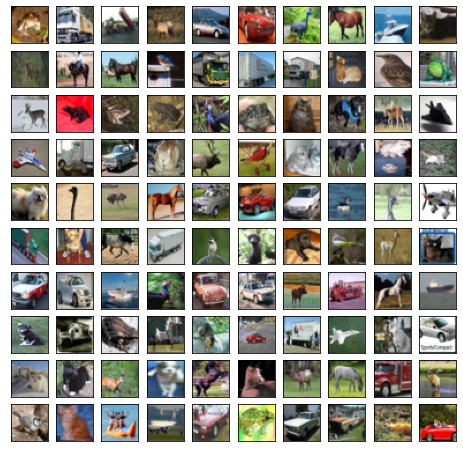

In [7]:
fig,axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(xtrain[i])

In [8]:
Xtrain=xtrain.astype('float32')/255
Xtest=xtest.astype('float32')/255

In [9]:
encoder=LabelEncoder()
Ytrain=np_utils.to_categorical(encoder.fit_transform(ytrain))
Ytest=np_utils.to_categorical(encoder.fit_transform(ytest))

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
label_count=Ytrain.shape[1]
label_count

10

In [13]:
def return_model():
    #create model
    model=Sequential()
    #add convolutional input layer,32 feature maps with a size of 3*3 
    model.add(Convolution2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
    #Dropout 20%
    model.add(Dropout(0.2))
    #add convolutional layer,32 feature maps with a size of 3*3
    model.add(Convolution2D(32,(3,3),activation='relu'))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add convolutional layer,64 feature maps with a size of 3*3
    model.add(Convolution2D(64,(3,3),activation='relu'))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add convolutional layer,128 feature maps with a size of 3*3
    model.add(Convolution2D(128,(3,3),activation='relu'))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(label_count,activation='softmax'))
    ###compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
    

In [14]:
model=return_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)        

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="relu", kernel_constraint=<keras.con...)`
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`


In [15]:
model.fit(Xtrain[:40000],Ytrain[:40000],epochs=10,validation_data=(Xtrain[40000:],Ytrain[40000:]),batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 136s 3ms/step - loss: 1.7236 - accuracy: 0.3557 - val_loss: 1.5074 - val_accuracy: 0.4579
Epoch 2/10
40000/40000 [==============================] - 133s 3ms/step - loss: 1.3199 - accuracy: 0.5235 - val_loss: 1.1973 - val_accuracy: 0.5732
Epoch 3/10
40000/40000 [==============================] - 135s 3ms/step - loss: 1.1290 - accuracy: 0.5942 - val_loss: 1.0419 - val_accuracy: 0.6281
Epoch 4/10
40000/40000 [==============================] - 139s 3ms/step - loss: 1.0129 - accuracy: 0.6411 - val_loss: 0.9304 - val_accuracy: 0.6769
Epoch 5/10
40000/40000 [==============================] - 135s 3ms/step - loss: 0.9138 - accuracy: 0.6754 - val_loss: 0.8788 - val_accuracy: 0.6919
Epoch 6/10
40000/40000 [==============================] - 134s 3ms/step - loss: 0.8303 - accuracy: 0.7066 - val_loss: 0.8206 - val_accuracy: 0.7089
Epoch 7/10
400

In [42]:
training_data=model.history.history

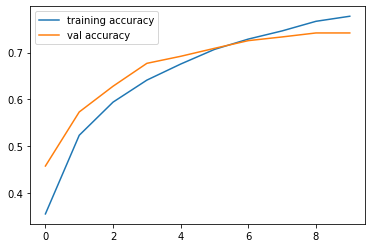

In [44]:
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')

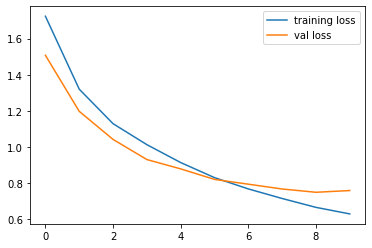

In [45]:
plt.plot(training_data['loss'],label='training loss')
plt.plot(training_data['val_loss'],label='val loss')
plt.legend(loc='best')

In [46]:
ypred=model.predict_classes(Xtest)
Ypred=encoder.inverse_transform(ypred)

In [47]:
accuracy_score(ytest,Ypred)*100

74.33

### stochastic gradient descent

In [20]:
#lets try model with stochastic gradient descent
def return_model():
    #create model
    model=Sequential()
    #add convolutional input layer,32 feature maps with a size of 3*3 
    model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',border_mode='same',W_constraint=maxnorm(3)))
    #Dropout 20%
    model.add(Dropout(0.2))
    #add convolutional layer,32 feature maps with a size of 3*3
    model.add(Conv2D(32,(3,3),activation='relu',border_mode='same',W_constraint=maxnorm(3)))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add convolutional layer,64 feature maps with a size of 3*3
    model.add(Conv2D(64,(3,3),activation='relu',border_mode='same',W_constraint=maxnorm(3)))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add convolutional layer,128 feature maps with a size of 3*3
    model.add(Conv2D(128,(3,3),activation='relu',border_mode='same',W_constraint=maxnorm(3)))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(label_count,activation='softmax'))
    ###compile model
    epochs=10
    sgd=SGD(lr=0.01,decay=0.01/epochs,nesterov=False,momentum=.9)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model
    

In [23]:
sgdmodel=return_model()
sgdmodel.summary()

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 128)        

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="relu", kernel_constraint=<keras.con...)`
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`


In [25]:
sgdmodel.fit(Xtrain[:40000],Ytrain[:40000],epochs=15,validation_data=(Xtrain[40000:],Ytrain[40000:]),batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 249s 6ms/step - loss: 2.0109 - accuracy: 0.2573 - val_loss: 1.7518 - val_accuracy: 0.3791
Epoch 2/15
40000/40000 [==============================] - 237s 6ms/step - loss: 1.6358 - accuracy: 0.4094 - val_loss: 1.5090 - val_accuracy: 0.4574
Epoch 3/15
40000/40000 [==============================] - 236s 6ms/step - loss: 1.4867 - accuracy: 0.4603 - val_loss: 1.3912 - val_accuracy: 0.4993
Epoch 4/15
40000/40000 [==============================] - 234s 6ms/step - loss: 1.3918 - accuracy: 0.4969 - val_loss: 1.3214 - val_accuracy: 0.5276
Epoch 5/15
40000/40000 [==============================] - 233s 6ms/step - loss: 1.3178 - accuracy: 0.5249 - val_loss: 1.2366 - val_accuracy: 0.5576
Epoch 6/15
40000/40000 [==============================] - 224s 6ms/step - loss: 1.2525 - accuracy: 0.5491 - val_loss: 1.2469 - val_accuracy: 0.5560
Epoch 7/15
40000/40000 [==============================] - 201s

In [30]:
training_data=sgdmodel.history.history

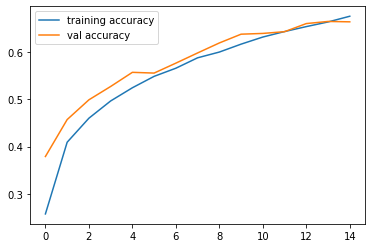

In [36]:
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')

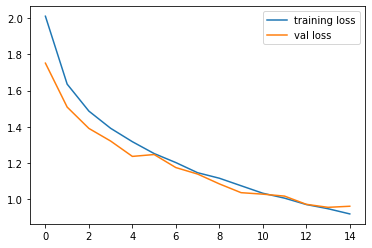

In [37]:
plt.plot(training_data['loss'],label='training loss')
plt.plot(training_data['val_loss'],label='val loss')
plt.legend(loc='best')

In [38]:
ypred=sgdmodel.predict_classes(Xtest)
Ypred=encoder.inverse_transform(ypred)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,Ypred)*100

65.74